In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_height = 244
img_width = 244
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)  
    
# Point to your dataset directory
train_data_dir = './Faulty_solar_panel'  # Change this to your dataset path

# Load the training data
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')  # Set as training data

# Load the validation data
validation_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')  # Set as validation data

# Define the CNN model from scratch
model = models.Sequential()

# First convolutional layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# Second convolutional layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Third convolutional layer
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flattening the output from the convolutional layers
model.add(layers.Flatten())

# Fully connected layer
model.add(layers.Dense(128, activation='relu'))

# Output layer with softmax for multi-class classification (4 classes in this case)
model.add(layers.Dense(6, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print model summary
model.summary()

# Train the model
epochs = 20  # Adjust based on your needs
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=epochs
)

# Save the trained model
model.save('solar_fault_classification_model.h5')


Found 711 images belonging to 6 classes.
Found 174 images belonging to 6 classes.


c:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 242, 242, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 121, 121, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 119, 119, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 59, 59, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 57, 57, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    12,845,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,939,206 (49.36 MB)

 Trainable params: 12,939,206 (49.36 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20


c:\Users\HP\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


22/22 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.2157 - loss: 2.8775 - val_accuracy: 0.3375 - val_loss: 1.6391
Epoch 2/20
 1/22 ━━━━━━━━━━━━━━━━━━━━ 16s 793ms/step - accuracy: 0.2812 - loss: 1.6373

c:\Users\HP\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.2812 - loss: 1.6373 - val_accuracy: 0.5000 - val_loss: 1.4689
Epoch 3/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.3522 - loss: 1.5947 - val_accuracy: 0.3688 - val_loss: 1.5108
Epoch 4/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5312 - loss: 1.4257 - val_accuracy: 0.5714 - val_loss: 1.4002
Epoch 5/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 65s 2s/step - accuracy: 0.4710 - loss: 1.4259 - val_accuracy: 0.3938 - val_loss: 1.4390
Epoch 6/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.4062 - loss: 1.4113 - val_accuracy: 0.4286 - val_loss: 1.1895
Epoch 7/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.4375 - loss: 1.4455 - val_accuracy: 0.4250 - val_loss: 1.3728
Epoch 8/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4375 - loss: 1.4103 - val_accuracy: 0.2143 - val_loss: 1.5398
Epoch 9/20
22/22 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.4897 - loss: 1.3304 - val_accuracy: 0.4563 - val_loss: 1.3379

In [2]:
# Evaluate the model on validation data
val_loss, val_acc = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_acc}")


5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.5630 - loss: 1.0964
Validation Loss: 1.0973291397094727
Validation Accuracy: 0.5874999761581421


In [3]:
import numpy as np

# Check the distribution of the classes in the training set
class_counts = np.unique(train_generator.classes, return_counts=True)
print(f"Class counts: {class_counts}")


Class counts: (array([0, 1, 2, 3, 4, 5]), array([166, 155, 152,  83,  56,  99], dtype=int64))


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create a new ImageDataGenerator with augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=30,  # Random rotation
    width_shift_range=0.1,  # Shift images horizontally
    height_shift_range=0.1,  # Shift images vertically
    fill_mode='nearest'  # Fill in new pixels
)

train_generator = train_datagen.flow_from_directory(
    './Faulty_solar_panel',
    target_size=(244, 244),
    batch_size=batch_size,
    class_mode='categorical'
)


Found 885 images belonging to 6 classes.


In [5]:
from sklearn.utils import class_weight

# Compute class weights
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)

# Convert class weights to dictionary
class_weights = dict(enumerate(class_weights))

# Train the model with class weights
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=30,
    class_weight=class_weights
)


Epoch 1/30


c:\Users\HP\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


27/27 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step - accuracy: 0.5779 - loss: 1.2088 - val_accuracy: 0.5750 - val_loss: 1.0548
Epoch 2/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4375 - loss: 1.5244 - val_accuracy: 0.7143 - val_loss: 0.9233
Epoch 3/30


c:\Users\HP\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


27/27 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step - accuracy: 0.6126 - loss: 1.0868 - val_accuracy: 0.6875 - val_loss: 0.9091
Epoch 4/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5000 - loss: 1.1312 - val_accuracy: 0.7857 - val_loss: 0.8054
Epoch 5/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - accuracy: 0.5927 - loss: 1.0836 - val_accuracy: 0.6500 - val_loss: 1.0033
Epoch 6/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5938 - loss: 1.2393 - val_accuracy: 0.7143 - val_loss: 0.9130
Epoch 7/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - accuracy: 0.6085 - loss: 1.0608 - val_accuracy: 0.6500 - val_loss: 0.9145
Epoch 8/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4375 - loss: 1.2787 - val_accuracy: 0.7857 - val_loss: 0.7145
Epoch 9/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step - accuracy: 0.6179 - loss: 0.9925 - val_accuracy: 0.7375 - val_loss: 0.7574
Epoch 10/30
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.5938 - loss: 1.0159 - val_accuracy: 0.7857 - val_loss: 0.9591


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


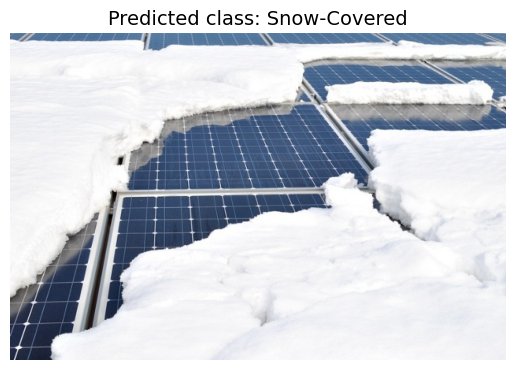

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Load and preprocess the image
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(244, 244))  # Ensure target_size matches the model input
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Normalize
    return img_array

# Predict function and display image with prediction
def predict_and_display_image(img_path, model, train_generator):
    # Preprocess the image
    img_array = preprocess_image(img_path)

    # Make predictions
    predictions = model.predict(img_array)
    predicted_class = np.argmax(predictions, axis=1)

    # Get class labels
    class_labels = list(train_generator.class_indices.keys())
    predicted_label = class_labels[predicted_class[0]]

    # Display the image
    img = image.load_img(img_path)
    plt.imshow(img)
    plt.axis('off')  # Hide axes

    # Show the prediction below the image
    plt.title(f"Predicted class: {predicted_label}", fontsize=14)
    plt.show()

# Test the prediction and display the image
predict_and_display_image('Faulty_solar_panel\Snow-Covered\Snow (15).jpg', model, train_generator)
